In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as pt

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])
training_set = torchvision.datasets.MNIST(root='./data', train = True, download = True, transform = trans)

#randomly generate integer labels
random_data = torch.tensor(np.random.randint(0, 10, (len(training_set)), ))

#override original targets with randomly generated ones
training_set.targets = random_data

testing_set = torchvision.datasets.MNIST(root='./data', train = False, download = True, transform = trans)

train_loader = torch.utils.data.DataLoader(training_set, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(testing_set, batch_size=64, shuffle=False)

In [7]:
class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)
    
model_1 = CNN_1()
optimizer_1 = torch.optim.Adam(model_1.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [8]:
def train_and_test_model(model, optimizer, trainloader, testloader, epochs=100):
    model.train()
    train_loss_arr, test_loss_arr, acc = [], [], []
    epoch = 0
    while epoch < epochs:
        total_train_loss = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            predicted_outputs = model(inputs)
            loss = criterion(predicted_outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
            
        train_loss = (total_train_loss / len(trainloader))
        train_loss_arr.append(train_loss)
        test_loss_arr.append(compute_test_losses_arr(model, testloader))
        
        print(f'Epoch: {epoch+1}, Train Loss: {train_loss}, Test Loss: {test_loss_arr[-1]}')
        epoch +=1
    return train_loss_arr, test_loss_arr

def compute_test_losses_arr(model, testloader):
    model.eval()
    total_test_loss = 0.0
    actual = 0.0
    with torch.no_grad():
        for inputs, labels in testloader:
            predicted_outputs = model(inputs)
            total_test_loss += criterion(predicted_outputs, labels).item()
            predicted_labels = predicted_outputs.argmax(dim=1, keepdim=True)
            actual += predicted_labels.eq(labels.view_as(predicted_labels)).sum().item()
                
    test_loss = (total_test_loss / len(testloader))
    return test_loss
        

train_losses_1, test_losses_1 = train_and_test_model(model_1, optimizer_1, train_loader, test_loader)

Epoch: 1, Train Loss: 2.3031208342326477, Test Loss: 2.3023051577768507
Epoch: 2, Train Loss: 2.3023830034585395, Test Loss: 2.2998608768365947
Epoch: 3, Train Loss: 2.3015397169442573, Test Loss: 2.300121562496112
Epoch: 4, Train Loss: 2.2992975935498787, Test Loss: 2.3049128025200716
Epoch: 5, Train Loss: 2.2935430515549586, Test Loss: 2.3198669716051428
Epoch: 6, Train Loss: 2.2811971773216717, Test Loss: 2.320511020672549
Epoch: 7, Train Loss: 2.2581927049388764, Test Loss: 2.3208742415069774
Epoch: 8, Train Loss: 2.222055404170998, Test Loss: 2.3911782449977412
Epoch: 9, Train Loss: 2.170098683981499, Test Loss: 2.3905830034025155
Epoch: 10, Train Loss: 2.104520567444596, Test Loss: 2.4846566907919136
Epoch: 11, Train Loss: 2.0269709014689234, Test Loss: 2.551441853213462
Epoch: 12, Train Loss: 1.9473593547654304, Test Loss: 2.639438506144627
Epoch: 13, Train Loss: 1.8639976777501706, Test Loss: 2.685527229005364
Epoch: 14, Train Loss: 1.7847311478942187, Test Loss: 2.831788785898

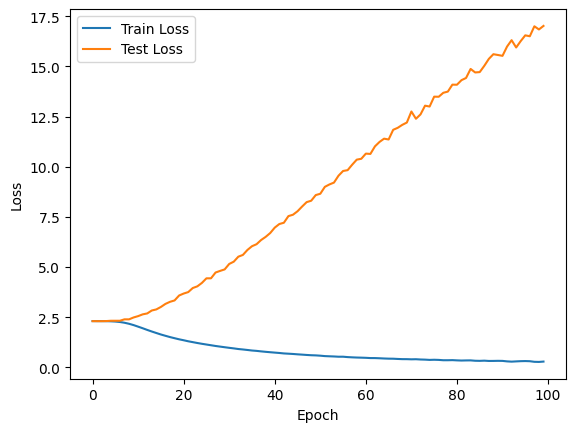

In [9]:
pt.plot(train_losses_1, label = 'Train Loss')
pt.plot(test_losses_1, label = 'Test Loss')
pt.xlabel('Epoch')
pt.ylabel('Loss')
pt.legend()
pt.show()